### Data_set: 
This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm


Our dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.

In [1]:
# Kindly change the below cells from markdown to code and execute it 

In [2]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:

    reader=csv.reader(file)
    df=pd.read_csv("data_set.csv")

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 1. Data Understanding  

In [3]:

df.shape #There are 159 rows and 7 columns present in the dataset.

(159, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
#Species feature is categorical.Other than the species feature, rest of the columns are all continous.

In [6]:
# FIVE-POINT SUMMARY
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
#
df.Species.describe()

count       159
unique        7
top       Perch
freq         56
Name: Species, dtype: object

In [8]:
#There are 159 rows present.There is presence of 7 different categories present in species column.They are as follows:

In [9]:
df.Species.value_counts() #Different fish species present in the dataset.

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [10]:
#Percentage distribution of each fish species
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
df.Species.value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Different types of fish species')
plt.show()

<Figure size 1000x800 with 1 Axes>

In [11]:
#Bream species are maximum present and whitefish are the minimum occuring fish species.

In [12]:
#
#check for null values
df.isna().sum() #The data has no null values.

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

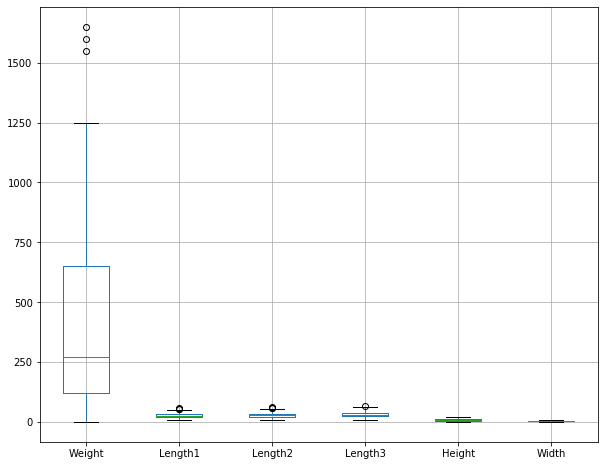

In [13]:
#check for outliers
plt.figure(figsize=(10,8))
df.boxplot()
plt.show()

In [14]:
#There is presence of outliers in weight in the upper extreme, length 1, length 2 and length 3. Since, the range of 
#weight is large, the outliers present in length 1 , 2 and 3 are not clearly seen and hence we plot a boxplot separately for those.

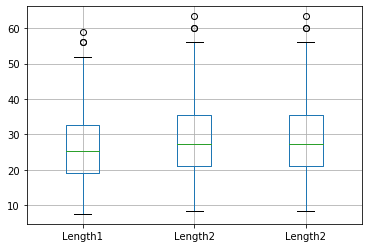

In [15]:
df[['Length1','Length2','Length2']].boxplot()
plt.show()

In [16]:
#There is presence of outliers in the upper extreme side for length 1 , 2 and 3.

### 2. Data Preparation 
 

In [17]:
# OUTLIER TREATMENT
import numpy as np
df_num=df.select_dtypes(include=np.number)
df_num=df_num.drop('Weight',axis=1) #we are excluding the target variable
#IQR TREATMENT
q1=df_num.quantile(0.25)
q3=df_num.quantile(0.75)
iqr=q3-q1
df_num=df_num[~((df_num < (q1-1.5*iqr))|(df_num> (q3+1.5*iqr))).any(axis=1)]
df_num.shape

(156, 5)

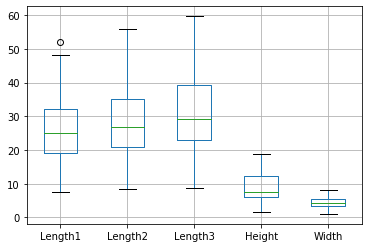

In [18]:
#Outlier treatment is done.Hence plotting box plot again
df_num.boxplot()
plt.show()

In [19]:
#Outliers are removed.Now, the outlier shown are the outliers obtained on newly obtained values(moderate outliers)

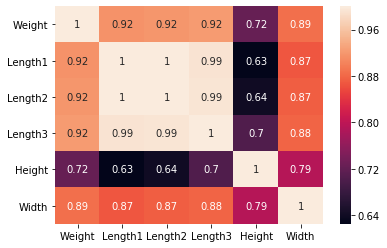

In [20]:
#
#correlation between numerical dependent features
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
#Inference
#All the variables show high correlation with the target variable weight.

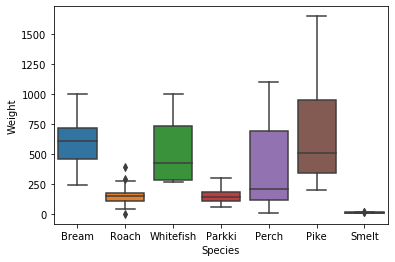

In [22]:
#Categorical variables vs target variable
#Species vs weight
sns.boxplot(df['Species'],df['Weight'])
plt.show()

In [23]:
#There is no correlation present in species vs weight.

In [24]:
#
#There is presence of high correlation between independent variables ie multicollinearity.
#In order to solve this, we can either scale the data and check after because high ranges of data can also lead to mulicollinearity.
#Even after scaling if there is presence of multicollinearity then we can perform variance inflation factor and eliminate 
#insignificant features

In [25]:
#
from sklearn.model_selection import train_test_split
en=pd.get_dummies(df['Species'],drop_first=True,prefix='Species')
df1=pd.concat([df_num,en],axis=1)
df1.head()

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [34]:
x=df1
x=sm.add_constant(x)
y=df['Weight']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)
print('Shape of x_train',x_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_test',y_test.shape)

Shape of x_train (111, 12)
Shape of y_train (111,)
Shape of x_test (48, 12)
Shape of y_test (48,)


In [28]:
#Hypothesis
#Ho: mean of y_train = mean of y_test
#Ha: mean of y_train != mean of y_test
#These both are 2 independent variables
from scipy.stats import shapiro,mannwhitneyu
shapiro(y_train)#not normal

(0.8881478905677795, 1.2710154351225356e-07)

In [29]:
shapiro(y_test)#not normal. Therefore, independent non-parametric test

(0.8717749118804932, 8.686552610015497e-05)

In [30]:
mannwhitneyu(y_train,y_test)

MannwhitneyuResult(statistic=2580.5, pvalue=0.3777308984922695)

In [31]:
#Since, p value is not less than 0.05. Null hypothesis is accepted. Therefore, means of y_train and y_test are equal.
#Therefore, sample is a representation of the overall data. Hence proved statistically.

### 3. Model Building 

In [75]:
# 
import statsmodels.api as sm
df_num=df.select_dtypes(include=np.number)
df_num=df_num.drop('Weight',axis=1)
en=df.select_dtypes(include='O')
dummy=pd.get_dummies(en,drop_first=True)
x=pd.concat([df_num,dummy],axis=1)
y=df['Weight']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
y_pred=model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           6.85e-82
Time:                        10:21:34   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -918.3321    127.083     -7.226      0.000   -1169.478    -667.186
Length1             -80.3030     36.279     -2.214      0.028    -151.998      -8.608
Length2              79.8886     45.718      1.747      0.083     -10.461     170.238
Length3              32.5354     29.300      1.110      0.269     -25.369      90.439
Height                5.2510     13.056      0.402      0.688     -20.551      31.053
Width                -0.5154     23.913     -0.022      0.983     -47.773      46.742
Species_Parkki      164.7227     75.699      2.176      0.031      15.123     314.322
Species_Perch       137.9489    120.314      1.147      0.253     -99.819     375.717
Species_Pike       -208.4294    135.306     -1.540      0.126    -475.826      58.968
Species_Roach       103.0400     91.308      1.128      0.261     -77.407     283.487
Species_Smelt       446.0733    119.430      3.735      0.000     210.051     682.095
Species_Whitefish    93.8742     96.658      0.971      0.333     -97.145     284.893
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# R squared value
model.rsquared

0.9360849020585845

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
print('Root mean squared error ',rmse)

Root mean squared error  90.21701053757441


In [53]:
def mape(actual,predicted):
    return (np.mean(np.abs((actual-predicted)/(actual))*100))
mape(y,y_pred)

inf

In [56]:
#
#There is high multicollinearty present between independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_num=df.select_dtypes(include=np.number)
vif=pd.DataFrame()
vif['VIF factor']=[variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features']=df_num.columns
print(vif)

     VIF factor Features
0      6.832973   Weight
1  13551.449805  Length1
2  16775.194678  Length2
3   3561.912619  Length3
4     83.402186   Height
5     94.052933    Width


In [62]:
df_num=df_num.drop(['Length1','Length2','Length3'],axis=1)
vif=pd.DataFrame()
vif['VIF factor']=[variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features']=df_num.columns
print(vif)

   VIF factor Features
0    5.622187   Weight
1   14.599000   Height
2   18.431558    Width


In [ ]:
#thus, we set the vif threshold to 15. weight, height and width are the significant features.

In [77]:
#
#FEATURE SELECTION
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
rfe_m=RFE(estimator=linreg,n_features_to_select=5)
rfe_m=rfe_m.fit(x,y)
feat_ind=pd.Series(data=rfe_m.ranking_,index=x.columns)
sig_feat=feat_ind[feat_ind==1].index
print(sig_feat)

Index(['Species_Parkki', 'Species_Pike', 'Species_Smelt', 'Length1',
       'Length2'],
      dtype='object')


In [76]:
x=x[['Species_Parkki','Species_Pike','Species_Smelt','Length1','Length2']]
y=df['Weight']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     441.7
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           5.58e-89
Time:                        10:21:45   Log-Likelihood:                -942.54
No. Observations:                 159   AIC:                             1897.
Df Residuals:                     153   BIC:                             1915.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -770.9048     31.368    -24.576      0.000    -832.876    -708.934
Species_Parkki    79.7703     30.484      2.617      0.010      19.547     139.993
Species_Pike    -354.9108     31.536    -11.254      0.000    -417.213    -292.608
Species_Smelt    308.0329     34.002      9.059      0.000     240.859     375.207
Length1          -76.2129     28.705     -2.655      0.009    -132.922     -19.503
Length2          111.7307     26.786      4.171      0.000      58.813     164.648
==============================================================================
Omnibus:                       36.470   Durbin-Watson:                   0.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.011
Skew:                           1.043   Prob(JB):                     2.31e-16
Kurtosis:                       5.552   Cond. No.                         279.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#
#The model shows 93.5 percent total varation in weight.
#F stat p value is lesser than 0.05 which shows that the model is significant.
#Durbin-watson shows the presence of positive autocorrelation.
#Beta of constant is -770.90 which shows that even if all the other variables are 0. Then the weight will be -770.
#Beta of species pike and length states that with one unit change in weight it decreases.
#Beta of species parkki , length 1 states that with one unit change in weight it increases.
#Condition number states that there is moderate autocorrelation.

In [ ]:
#
# the base model has an adjusted r sq of 0.931 and the newly fitted model has an adjusted r sq of 0.933 which shows increase 
#in model performance.Hence, the newly built model is significant.